### Predicting Customer Churn in the Telecommunications Industry: A Data-Driven Approach to Improve Customer Retention

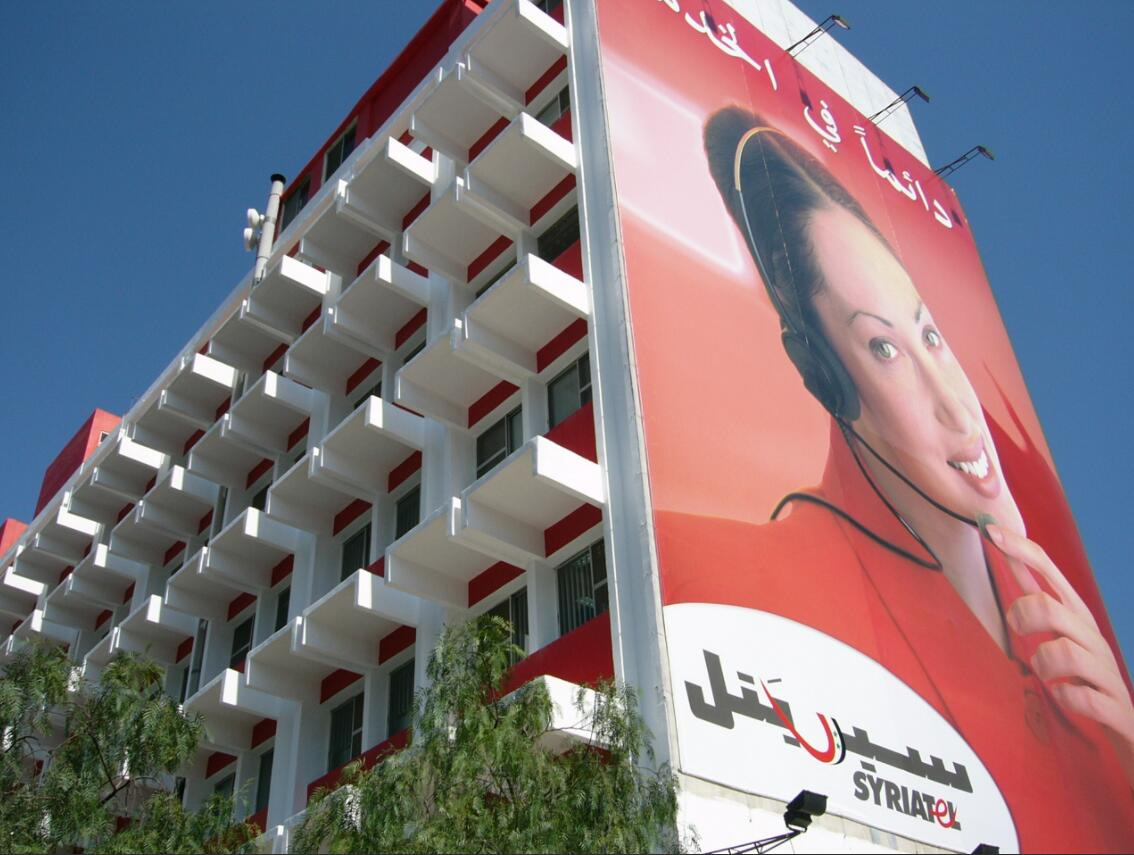

### Project Overview:
This project aims to develop a classification model that will predict customer churn for SyriaTel, a telecommunications company. I have chosen to follow the CRISP-DM method to complete this project. It will involve six stages: Business Understanding, Data Understanding, Data Preparation, Modeling, Evaluation, and Deployment. The project purposes to provide insights into the patterns and factors influencing customer churn, and also develop a predictive model to assist in reducing customer attrition.

### Business Understanding:
SyriaTel are the major stakeholders for this project. They are interested in reducing customer churn. By helping them predict customer churn, they can take proactive measures to ensure maximum customer retentions and profit maximization. The project majory focused on identifying patterns that facilitate to customer churn and providing recommendations on how to mitigate this.

##### Data Loading and Exploration.
To be able to understand our data, we have to look into it before further analysis and comment. This step will enable us understand our data and come up with suitable models.
It will also help us specifically tailor our analysis to the main purpose of the project.

In [208]:
import pandas as pd
import numpy as np
df = pd.read_csv('syria-tel.csv')
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [209]:
# The information in the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

##### Categorical columns

In [210]:
categorical_columns = df.select_dtypes(exclude='number')
categorical_columns.columns

Index(['state', 'phone number', 'international plan', 'voice mail plan',
       'churn'],
      dtype='object')

#### Numerical Columns


In [211]:
numeric_columns = df.select_dtypes(include='number')
numeric_columns.columns

Index(['account length', 'area code', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls'],
      dtype='object')

#### Lets check null values

In [212]:
df.isna().sum()

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

#### Check for duplicates


In [213]:
df.duplicated().sum()

0

### Data Understanding:
Based on the above simple exploration, we can see that our data frame has 3332 rows and 21 columns.
We can also see that we have 5 categorical columns and 16 numerical columns. 
Some of the columns actually do not seem to be very important in our preditctions thereafter. For example, the phone number column has nothing to do with customer terminating their service for the company.

Lastly we can see that we do not have missing values in all the columns, no duplicated values, and also all the columns have the respective correct data types.

### Data Analysis and Visualization
Let us now understand how our variables are distributed or correlated to one another. This will largely give us very deeper undersatnding our our data and it will make it easier to handle our data thereafter.

#### Categorical Values analysis and Visualization

* **Analysis on the churn feauture**

churn
False    85.508551
True     14.491449
Name: proportion, dtype: float64


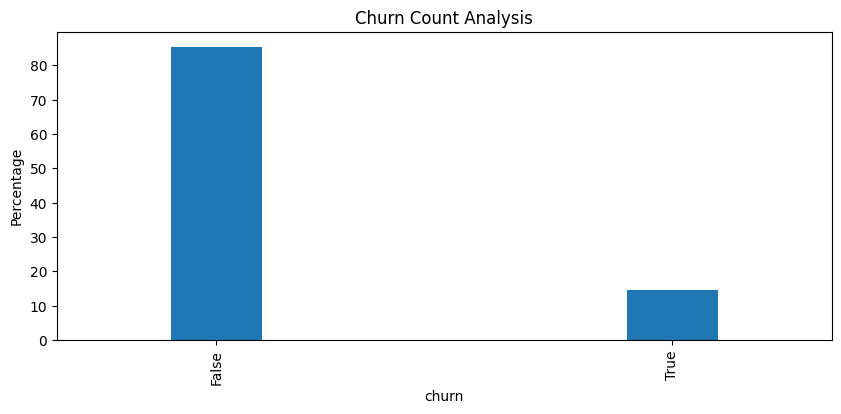

In [214]:
churn_count = df.churn.value_counts(normalize=True)*100
print(churn_count)
churn_count.plot(kind='bar', figsize=(10,4), ylabel='Percentage', title='Churn Count Analysis', width=0.2);

> From the above bar, 85.51% of customers do not churn while 14.49% of the customers churn from the company.
> The distribution of the binary classes shows a data imbalance which will require some class imbalance treatment thereafter to prevent the model from making flase predictions.

* **Distribution of Area Code Feature**

area code
415    1655
510     840
408     838
Name: count, dtype: int64


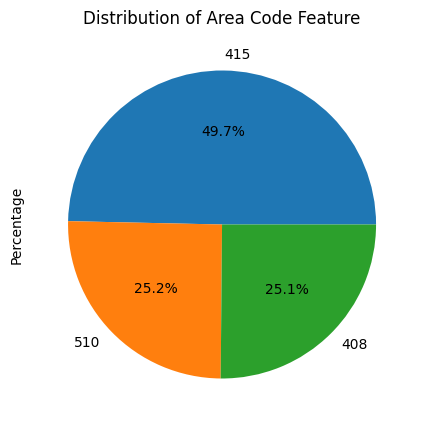

In [215]:
area_code_counts = df['area code'].value_counts()
print(area_code_counts)
area_code_counts.plot(kind='pie', ylabel="Percentage", title='Distribution of Area Code Feature', figsize=(10,5), autopct='%1.1f%%');

Based on the pie chart above, 49.7% of customer come from area code 415. That's nearly half of the total number of customers. The two area code have about 25% of the customers coming from them.

* **Distribution of numeric variables**

In [216]:
numeric_columns.columns

Index(['account length', 'area code', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls'],
      dtype='object')

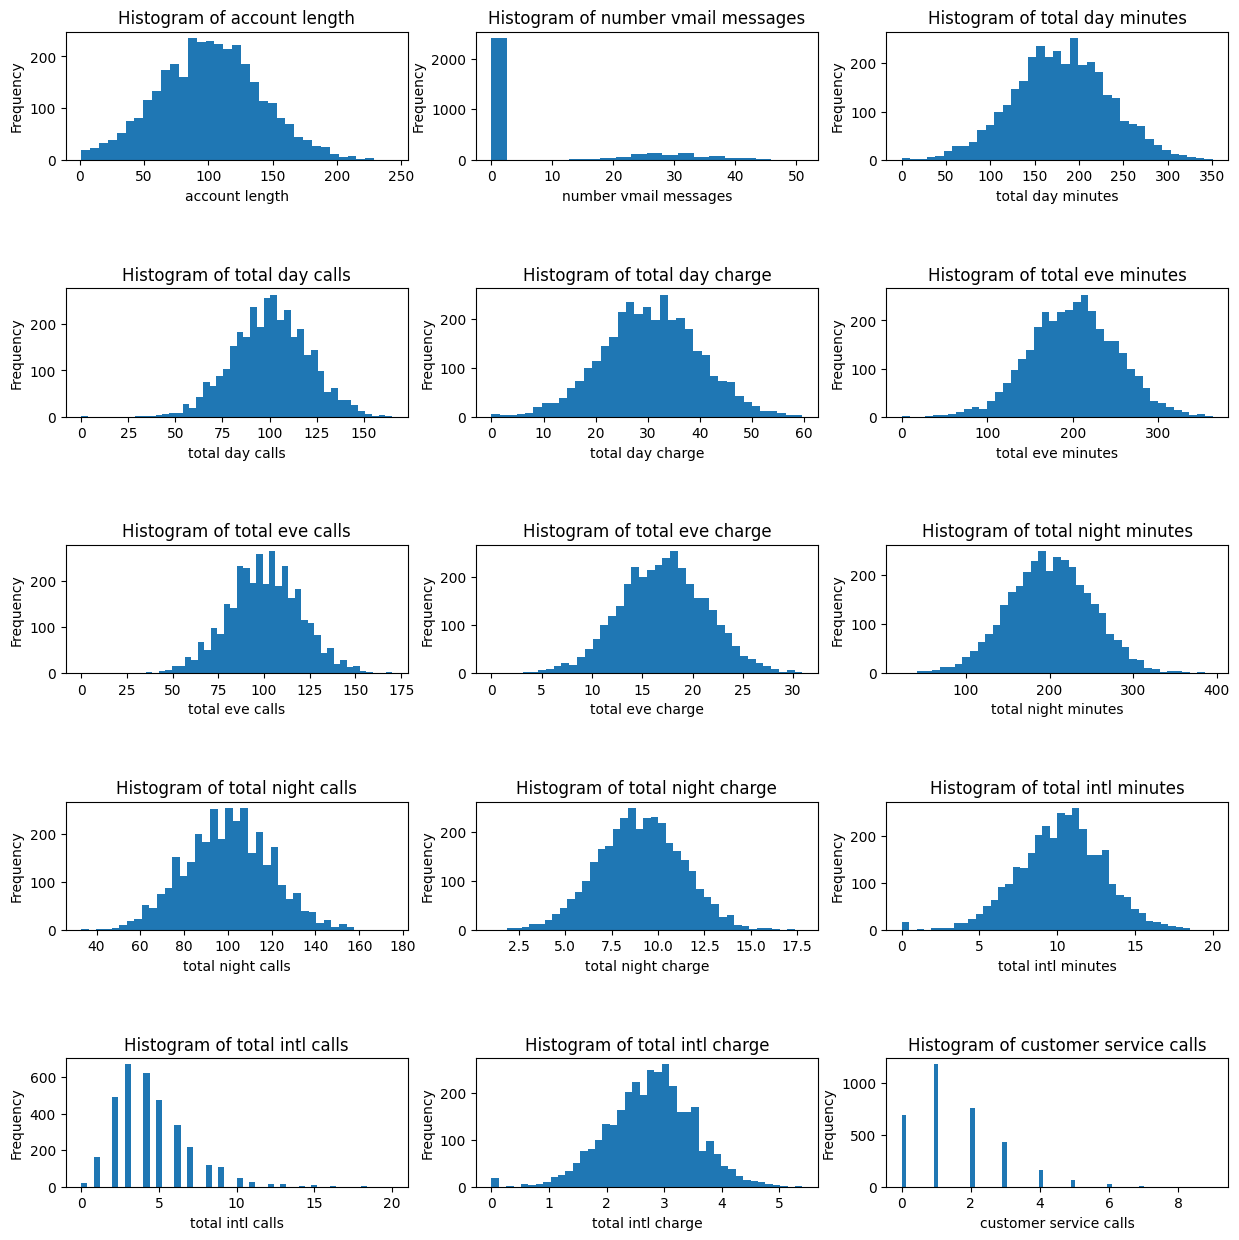

In [217]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(5, 3, figsize=(15, 15))
rows = [0, 1, 2, 3, 4, 5]
columns = [0, 1, 2]

numeric_columns_copy = numeric_columns.drop('area code', axis=1)
for i, column in enumerate(numeric_columns_copy.columns):
    row = i // 3
    col = i % 3
    
    ax[row][col].hist(numeric_columns_copy[column], bins='auto')
    ax[row][col].set_title(f"Histogram of {column}")
    ax[row][col].set_xlabel(column)
    ax[row][col].set_ylabel("Frequency")

plt.subplots_adjust(hspace=1)  # Adjust vertical spacing between rows
plt.show()


From the above, we can see that most of the distribution plots are normally distributed. This

* **Correlation Matrix**

> Let us now look into the association of different variables.

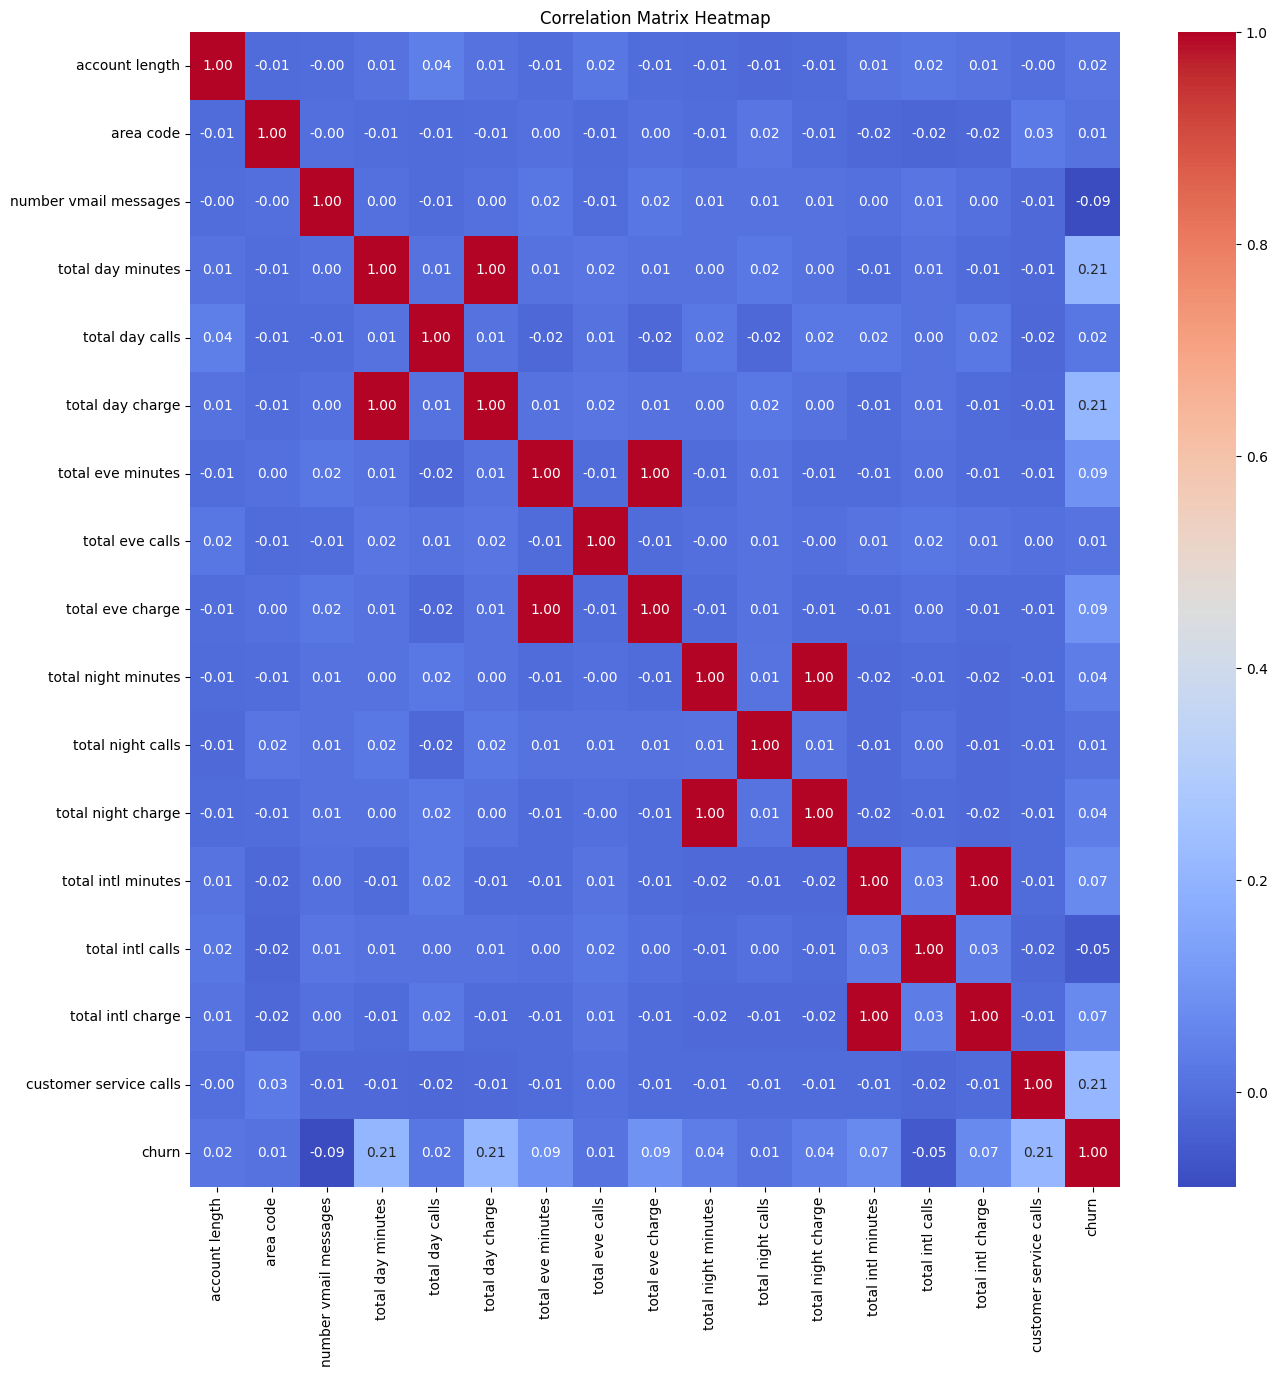

In [218]:
import seaborn as sns
corr_matrix = df.corr(numeric_only=True)
plt.figure(figsize=(15,15))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix Heatmap")
plt.show()

From the above correlation matrix, we can observe that most of the variables are not strongly correlated. However, there ares some variables that exhibit a perfect correlation. This makes sense since some variables are directly correlated. For example, tel charges are directly correlated to the time spent on call.

### Data Processing
Since we now have a clear idea of how our variables are distributed, we can now process our data and get it ready for our models. We will remove outliers from out data, we will also remove multicollinearity in our dataframe. We will perfomr come scaling and also remove imbalance using the SMOTE method. We can then proceed with building models to make the required predictions.

**Removing outliers**

In [219]:
# Define the threshold in this case I will consider values above 3 standard deviations as outliers
print(f"The shape of our df before dropping outliers was {df.shape}")
threshold = 3

for col in numeric_columns:

    # Calculate z-scores for each numeric column
    z_scores = np.abs((df[col] - df[col].mean()) / df[col].std())

    # Create boolean mask for rows with outliers
    outlier_mask = z_scores > threshold

    df = df[~outlier_mask]

print(f"The shape of our df after dropping outliers is {df.shape}")

The shape of our df before dropping outliers was (3333, 21)
The shape of our df after dropping outliers is (3155, 21)


In [220]:
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


**Convert Churn to Binary**

In [221]:
df['churn'] = df['churn'].map({False: 0, True: 1})
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


Since phone number is not going to be useful, let us just drop it at this point.

In [222]:
df.drop('phone number', axis=1, inplace=True)

**Convert Categorical Variables to numeric**

In [223]:
cat_cols = ['state', 'international plan', 'voice mail plan']
df = pd.get_dummies(df, columns=cat_cols, dtype=float)
df

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,...,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY,international plan_no,international plan_yes,voice mail plan_no,voice mail plan_yes
0,128,415,25,265.1,110,45.07,197.4,99,16.78,244.7,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,107,415,26,161.6,123,27.47,195.5,103,16.62,254.4,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,137,415,0,243.4,114,41.38,121.2,110,10.30,162.6,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,84,408,0,299.4,71,50.90,61.9,88,5.26,196.9,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
4,75,415,0,166.7,113,28.34,148.3,122,12.61,186.9,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,192,415,36,156.2,77,26.55,215.5,126,18.32,279.1,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3329,68,415,0,231.1,57,39.29,153.4,55,13.04,191.3,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3330,28,510,0,180.8,109,30.74,288.8,58,24.55,191.9,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3331,184,510,0,213.8,105,36.35,159.6,84,13.57,139.2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0


### Split into train and  test

In [224]:
# Split the dataset into features and target variable
X = df.drop('churn', axis=1)
y = df['churn']

In [225]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

#### Lets scale the split dataset

In [226]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_transformed = scaler.fit_transform(X_train)
X_test_transformed = scaler.transform(X_test)

### Applying SMOTE Technique to Resolve Unbalanced 'churn' Feature

SMOTE (Synthetic Minority Oversampling Technique) is an oversampling technique used to address class imbalance in a dataset. It involves generating synthetic samples for the minority class by interpolating between neighboring instances. This helps to overcome the overfitting issue that can arise from random oversampling.

In [227]:
from imblearn.over_sampling import SMOTE
X_train_resampled, y_train_resampled = SMOTE().fit_resample(X_train_transformed, y_train)

**Churn Distribution Plot after Resampling**

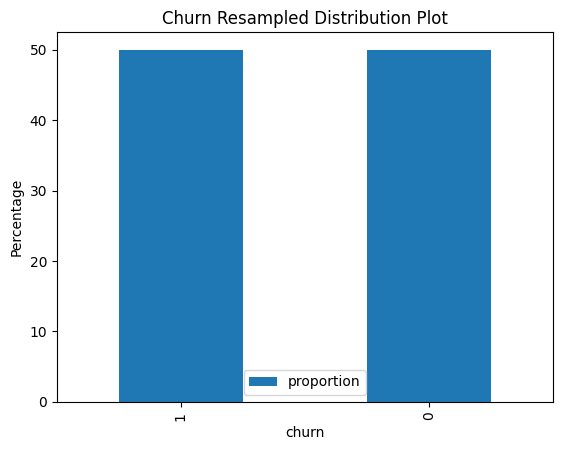

In [235]:
df_y_resampled = pd.DataFrame(y_train_resampled.value_counts(normalize=True))*100
df_y_resampled.plot(kind='bar', title='Churn Resampled Distribution Plot', ylabel="Percentage");